In [7]:
import h5py
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=5, suppress=True)
import os 
import pandas as pd
import sys
import xarray as xr

sys.path.append('../')

from prediction.batch import dataset_loaders
import utils

In [8]:
# constants
dataset_filepath = '../../data/datasets/june/bn_30_second_5_lane_heuristic.h5'
dataset_label = 'debug'

In [9]:
# load the data
f = h5py.File(dataset_filepath)
feature_names = f['risk'].attrs['feature_names'].ravel()
data_array = xr.DataArray(
    data=f['risk/features'][:], 
    coords={'features': feature_names},
    dims=('samples', 'timesteps', 'features')
)

In [10]:
feature_names

array(['relative_offset', 'relative_heading', 'velocity', 'length',
       'width', 'lane_curvature', 'markerdist_left', 'markerdist_right',
       'accel', 'jerk', 'turn_rate_global', 'angular_rate_global',
       'turn_rate_frenet', 'angular_rate_frenet', 'timegap',
       'timegap_is_avail', 'time_to_collision',
       'time_to_collision_is_avail', 'is_colliding', 'out_of_lane',
       'negative_velocity', 'lane_offset_left',
       'lane_offset_left_is_avail', 'lane_offset_right',
       'lane_offset_right_is_avail', 'fore_m_dist', 'fore_m_vel',
       'fore_m_accel', 'fore_m_jerk', 'fore_m_is_avail', 'fore_l_dist',
       'fore_l_vel', 'fore_l_accel', 'fore_l_jerk', 'fore_l_is_avail',
       'fore_r_dist', 'fore_r_vel', 'fore_r_accel', 'fore_r_jerk',
       'fore_r_is_avail', 'rear_m_dist', 'rear_m_vel', 'rear_m_accel',
       'rear_m_jerk', 'rear_m_is_avail', 'rear_l_dist', 'rear_l_vel',
       'rear_l_accel', 'rear_l_jerk', 'rear_l_is_avail', 'rear_r_dist',
       'rear_r_vel', 

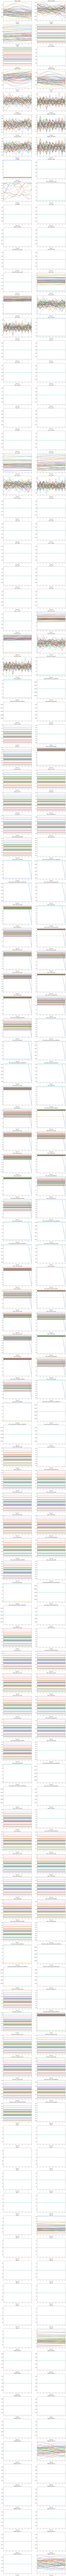

In [13]:
# visualize them all
sidx = 300
nsamples = 50
nrows = int((len(feature_names[:sidx])+1) / 2) 
fig, axes = plt.subplots(nrows=nrows, ncols=2)
fig_height = nrows * 6
for i, feature_name in enumerate(feature_names[:sidx]): 
    r = int(i / 2)
    c = i % 2
    (data_array.loc[:nsamples,:,feature_name].transpose().to_pandas()
     .plot(legend=False, ax=axes[r,c], figsize=(16, fig_height), title=feature_name))

In [11]:
# find largest difference between timesteps across samples for each feature
x = np.array(data_array)
y = np.abs(x[:,:-1,:] - x[:,1:,:])
max_diff_per_sample = np.max(y, axis=1)
argmax_diff_per_feature = np.argmax(max_diff_per_sample, axis=0)
print(argmax_diff_per_feature)

[3931  781 8158    0    0    0 3931 3931 4072 5938 6220 6220 6220 6220 1560
    0 8159    0    0    0    0    0    0    0    0 1560 8159 4073 5939    0
    0    0    0    0    0    0    0    0    0    0 1559 8157 4071 5937    0
    0    0    0    0    0    0    0    0    0    0 1561 8160 4074 5940    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  800    0  800  800  800  800  800  800  800  800
  800    0    0    0    0    0  800    0  800  800  800  800  800  800  800
  800  800    0    0    0    0    0  800    0  800  800  800  800  800  800
  800  800  800    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 1

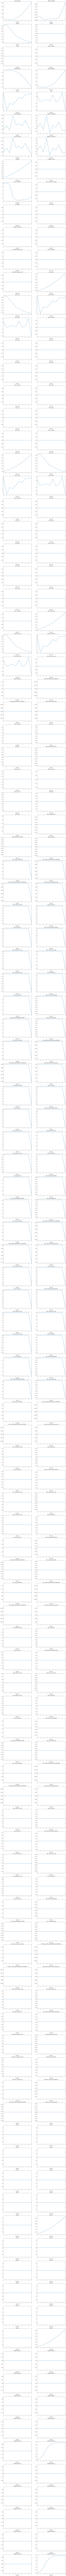

In [12]:
# plot only the sample with the largest single timestep change
sidx = 300
nrows = int((len(feature_names[:sidx])+1) / 2) 
fig, axes = plt.subplots(nrows=nrows, ncols=2)
fig_height = nrows * 6
for i, feature_name in enumerate(feature_names[:sidx]): 
    r = int(i / 2)
    c = i % 2
    idx = argmax_diff_per_feature[i]
    (data_array.loc[idx,:,feature_name].transpose().to_pandas()
     .plot(legend=False, ax=axes[r,c], figsize=(16, fig_height), title=feature_name))